<a href="https://colab.research.google.com/github/anvithakp/ML-Google-Colab/blob/master/K_means_clustering_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-1
## Method - 2

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Data/housepricing.csv"
data = pd.read_csv(path)

# Visualizing the data

In [ ]:
data.head()

,Price,Lot Size,Waterfront,Age,Land Value,New Construct,Central Air,Fuel Type,Heat Type,Sewer Type,Living Area,Pct College,Bedrooms,Fireplaces,Bathrooms,Rooms
0,132500,0.09,0,42,50000,0,0,3,4,2,906,35,2,1,1.0,5
1,181115,0.92,0,0,22300,0,0,2,3,2,1953,51,3,0,2.5,6
2,109000,0.19,0,133,7300,0,0,2,3,3,1944,51,4,1,1.0,8
3,155000,0.41,0,13,18700,0,0,2,2,2,1944,51,3,1,1.5,5
4,86060,0.11,0,0,15000,1,1,2,2,3,840,51,2,0,1.0,3


# Data Cleaning
Removing rows with Non numeric values, if any

In [ ]:
data = data.dropna()
data = data.reset_index(drop=True)

In [ ]:
new_data = data[["Age","Price"]]

In [ ]:
new_data.describe()

,Age,Price
count,1728.000000,1728.000000
mean,27.916088,211966.705440
std,29.209988,98441.391015
min,0.000000,5000.000000
25%,13.000000,145000.000000
50%,19.000000,189900.000000
75%,34.000000,259000.000000
max,225.000000,775000.000000


Now, we are standardizing the data due to a huge difference in the magnitudes of house age and price

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

pd.DataFrame(scaled_data).describe()

,0,1
count,1.728000e+03,1.728000e+03
mean,6.347803e-17,-9.136210e-17
std,1.000289e+00,1.000289e+00
min,-9.559802e-01,-2.103044e+00
25%,-5.107981e-01,-6.804667e-01
50%,-3.053294e-01,-2.242257e-01
75%,2.083422e-01,4.779180e-01
max,6.749094e+00,5.721133e+00


In [ ]:
points = scaled_data

In [ ]:
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

#Clustering

Here we are implementing K-means clustering algorithm using Tensorflow library. K-means is a type of unsupervised learning and one of the popular methods of clustering unlabelled data into k number of clusters

In [ ]:
num_clusters = 3
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxwn2ryc2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Now lets train the data

In [ ]:
num_iterations = 10
previous_centers = None

for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpxwn2ryc2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpxwn2ryc2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...
INFO:tensorflow:Loss for final step: None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-01T05:09:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxwn2ryc2/model.ckpt-1
INFO:tensorflow:Running local_

Now lets map the input points to their clusters

In [ ]:
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxwn2ryc2/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
point: [ 0.4823004  -0.80748259] is in cluster 0 centered at [-0.14479804 -0.42248788]
point: [-0.95598015 -0.31349249] is in cluster 0 centered at [-0.14479804 -0.42248788]
point: [ 3.59857493 -1.04627242] is in cluster 1 centered at [ 2.8029315  -0.34177145]
point: [-0.51079808 -0.57885403] is in cluster 0 centered at [-0.14479804 -0.42248788]
point: [-0.95598015 -1.27937193] is in cluster 0 centered at [-0.14479804 -0.42248788]
point: [ 0.10560787 -0.93449845] is in cluster 0 centered at [-0.14479804 -0.42248788]
point: [ 0.17409742 -0.59917657] is in cluster 0 centered at [-0.14479804 -0.42248788]
point: [-0.16835033 -0.42643499] is in cluster 0 centered at [-0.14479804 -0.42248788]
point: [ 0.27683175 -1.23933653] is in

Lets plot the graph

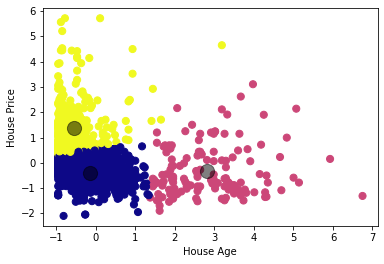

In [ ]:
plt.scatter(points[:, 0], points[:, 1], c=cluster_indices, s=50, cmap='plasma')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

# Summary

From the above graph we can clearly visualize the clusters. We can see that almost all the older houses clearly sell at lower price points.

Majority of the newer homes sell at low to medium price points.whereas some of the newer homes are sold at higher price points. The reason for this might be the difference in the amenities,neighbourhood or other factors when gone through the dataset.

Therefore the clusters can be categorized as : Old houses cluster, new homes with better facilities /amenities /neighbourhood cluster and new homes with poor facilities /amenities /neighbourhood cluster. 